In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import networkx as nx
from networkx.drawing import draw_networkx
from IPython.display import HTML, Image
from graphviz import Source
import os
import logging
%matplotlib inline

In [59]:
#df_bgs = pd.read_excel('/data/sun/OxCGRT/OxCGRT_Download_latest_data.xlsx')
#!wget -O OxCGRT_timeseries_all.xlsx https://github.com/OxCGRT/covid-policy-tracker/raw/master/data/timeseries/OxCGRT_timeseries_all.xlsx
# sheets of relevance 'stringencyindex', 's12_testingframework','s13_contacttracing','confirmedcases'
df_bgs = pd.read_excel('OxCGRT_timeseries_all.xlsx',sheet_name='stringencyindex')#,sheet_name='stringencyindex')
#df_bgs = df_bgs.T
for sheetname in ['s12_testingframework','s13_contacttracing','confirmedcases']:
    print(sheetname)
    df_bgs = pd.concat([df_bgs,pd.read_excel('OxCGRT_timeseries_all.xlsx',sheet_name=sheetname)])
    #df_bgs.columns = df_bgs.iloc[0].values
            #df_bgs.drop(['CountryName','CountryCode'],inplace=True)
df_bgs=df_bgs.T
df_bgs.columns = df_bgs.iloc[0].values
df_bgs.drop(['CountryName','CountryCode'],inplace=True)
#data_bgs = 
#df_bgs.columns = df_bgs.columns.str.replace(' ', '_')
#df_bgs.columns
#df_bgs['CountryName'] = df_bgs['CountryName'].str.replace(' ','-')

s12_testingframework
s13_contacttracing
confirmedcases


In [69]:
df_bgs['China']

,China,China,China,China
01jan2020,0,1,1,27
02jan2020,0,1,1,27
03jan2020,0,1,1,44
04jan2020,0,1,1,44
05jan2020,0,1,1,59
06jan2020,0,1,1,59
07jan2020,0,1,1,59
08jan2020,0,1,1,59
09jan2020,0,1,1,59
10jan2020,0,1,1,59


In [141]:
'''
measure_cols = ['S1_School_closing','S2_Workplace_closing','S3_Cancel_public_events',
               'S4_Close_public_transport','S5_Public_information_campaigns','S6_Restrictions_on_internal_movement',
               'S7_International_travel_controls','S8_Fiscal_measures','S9_Monetary_measures',
                'S10_Emergency_investment_in_health_care','S11_Investment_in_Vaccines','StringencyIndex'
               ]
'''
measure_cols = ['Stringency','Testing','Tracing','ConfirmedCases']
relevant_cols = ['Stringency','ConfirmedCases','Delta7']

In [137]:
df_flights_2020 = pd.read_parquet(flight_data)

In [142]:
outdir = 'graphsmeasures'
logging.basicConfig(filename='example.log',level=logging.DEBUG)

for country_name in ['China','Italy','Germany','Spain','United States','United Kingdom','Austria','Denmark']:#
    print(country_name)
    #df_bgs_country = df_bgs[df_bgs['CountryName']==country_name][measure_cols+['ConfirmedCases']]
    df_bgs_country = df_bgs[country_name]
    df_bgs_country.columns = measure_cols
    
    df_bgs_country['Delta7'] = df_bgs_country['ConfirmedCases'] - df_bgs_country['ConfirmedCases'].shift(7)
    df_bgs_country = df_bgs_country[relevant_cols]
    df_bgs_country.replace([np.nan],0,inplace=True)
    #df_bgs_country.drop(['ConfirmedCases'],axis=1).to_csv('%s.csv'%(country_name),index=None)
    df_flights_country = df_flights_2020[(df_flights_2020['arrival_country_name'] == 'United States') & 
                (df_flights_2020['departure_country_name'] == 'United States')]
    df_bgs_country.index = pd.to_datetime(df_bgs_country.index)
    df_flights_country_datewise = df_flights_country.groupby('flight_date').count()['flight_id']
    
    country_file_name = country_name.replace(' ','-')
    #df_bgs_country.to_csv('%s.csv'%(country_file_name),index=None)
    pd.concat([df_bgs_country,df_flights_country_datewise],axis=1).dropna().to_csv('%s.csv'%(country_file_name),index=None)

    java_cmd = 'java -jar /home/sds/Downloads/causal-cmd-1.1.3/causal-cmd-1.1.3-jar-with-dependencies.jar --algorithm fges --data-type continuous --dataset %s.csv --delimiter  comma --score cg-bic-score --out %s --prefix %s --skip-validation --json-graph'%(country_file_name,outdir,country_file_name)
    java_cmd_degraded = 'java -jar /home/sds/Downloads/causal-cmd-1.1.3/causal-cmd-1.1.3-jar-with-dependencies.jar --algorithm fges --data-type continuous --dataset %s.csv --delimiter  comma --score sem-bic --out %s --prefix %s --skip-validation'%(country_file_name,outdir,country_file_name)
    return_code = os.system(java_cmd)
    if return_code == 0: 
        with open('%s/%s_graph.json'%(outdir,country_file_name),'rt') as fh:
            file_data = json.load(fh)

        G = nx.DiGraph()
        G.add_nodes_from([_node['name'] for _node in file_data['nodes']])
        G.add_edges_from([(_edge['node1']['name'],_edge['node2']['name']) for _edge in file_data['edgesSet']
                         if _edge['endpoint2']['ordinal'] == 1])

        nx.drawing.nx_pydot.write_dot(G,'%s/%s.dot'%(outdir,country_file_name))

        s = Source.from_file('%s/%s.dot'%(outdir,country_file_name),format='png')
        Image(s.view())
    else:
        print(return_code)
        print('No graph structure determinable for %s. Look at out file instead'%(country_file_name))
        os.system(java_cmd_degraded)

China


/home/sds/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Italy


/home/sds/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Germany


/home/sds/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Spain


/home/sds/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


United States


/home/sds/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


United Kingdom


/home/sds/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Austria


/home/sds/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Denmark


/home/sds/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [88]:
from networkx.algorithms.moral import moral_graph

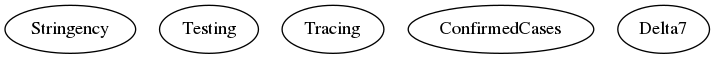

In [89]:
nx.drawing.nx_pydot.write_dot(moral_graph(G),'%s/%s.dot'%(outdir,'moral'))

s = Source.from_file('%s/%s.dot'%(outdir,'moral'),format='png')
Image(s.view())

In [90]:
df_flights_2020 = pd.read_parquet(path)

In [115]:
country_name = 'United States'
df_flights_country = df_flights_2020[(df_flights_2020['arrival_country_name'] == 'United States') & 
                (df_flights_2020['departure_country_name'] == 'United States')]
df_bgs_country = df_bgs[country_name]
df_bgs_country.columns = measure_cols
df_bgs_country.index = pd.to_datetime(df_bgs_country.index)
df_flights_country_datewise = df_flights_country.groupby('flight_date').count()['flight_id']
df_flights_country_datewise.columns = ['numflights']

In [130]:
pd.concat([df_bgs_country,df_flights_country_datewise],axis=1).dropna().to_csv('flightresp.csv',index=None)
java_cmd = 'java -jar /home/sds/Downloads/causal-cmd-1.1.3/causal-cmd-1.1.3-jar-with-dependencies.jar --algorithm fges --data-type continuous --dataset %s.csv --delimiter  comma --score cg-bic-score --out %s --prefix %s --skip-validation --json-graph'%('flightresp',outdir,country_file_name)
return_code = os.system(java_cmd)

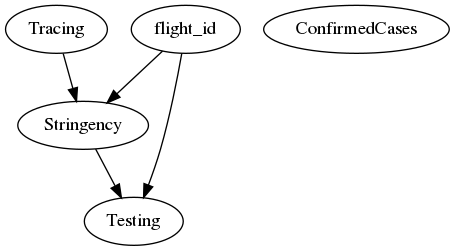

In [132]:
with open('%s/%s_graph.json'%(outdir,country_file_name),'rt') as fh:
            file_data = json.load(fh)

G = nx.DiGraph()
G.add_nodes_from([_node['name'] for _node in file_data['nodes']])
G.add_edges_from([(_edge['node1']['name'],_edge['node2']['name']) for _edge in file_data['edgesSet']
                 if _edge['endpoint2']['ordinal'] == 1])

nx.drawing.nx_pydot.write_dot(G,'%s/%s.dot'%(outdir,country_file_name))

s = Source.from_file('%s/%s.dot'%(outdir,country_file_name),format='png')
Image(s.view())